In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame


from numpy import dstack

import copy

import os
from glob import glob

from path import Path

from numpy import mean
from numpy import std

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional

from keras.models import model_from_json


from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

import random

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from matplotlib import pyplot


Using TensorFlow backend.


## Load model

In [2]:
# load json and create model
json_file = open('model-output/model-0.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model-output/model-0.h5")
print("Loaded model from disk")

Loaded model from disk


## Load samples

In [3]:
from helpers.classes.data_loader import DataLoader

root_path = "/Users/allarviinamae/EduWorkspace/openpose-jupyter-data-exploration/centered-keypoints"

sample_dir_names = [n for n in os.listdir(root_path) if os.path.isdir(f"{root_path}/{n}")]

samples = DataLoader.get_samples_list(sample_dir_names, root_path)

y_labels = DataLoader.get_y_labels(sample_dir_names) # classifier labels, where 0 = backflip and 1 = flack

In [4]:
from helpers.classes.padder import Padder

padded_samples_ndarray = np.asarray(Padder.get_padded_samples(samples))

## Predict

In [5]:
ynew = loaded_model.predict_classes(padded_samples_ndarray)
# show the inputs and predicted outputs
for i in range(len(padded_samples_ndarray)):
    pred_y = ynew[i]
    actual_y = y_labels[i]
    
    same = False
    if pred_y == actual_y:
        same = True
    
    print("Name=%s, X=%s, Predicted=%s, Actual=%s, same=%s" % (sample_dir_names[i], i, pred_y, actual_y, same))

Name=backflip-40-margus, X=0, Predicted=1, Actual=0, same=False
Name=flack-31-rasmus, X=1, Predicted=1, Actual=1, same=True
Name=flack-19-rasmus, X=2, Predicted=1, Actual=1, same=True
Name=flack-59-martin, X=3, Predicted=1, Actual=1, same=True
Name=backflip-66-allar, X=4, Predicted=0, Actual=0, same=True
Name=flack-55-martin, X=5, Predicted=1, Actual=1, same=True
Name=flack-68-rasmus, X=6, Predicted=1, Actual=1, same=True
Name=backflip-23-tiit, X=7, Predicted=0, Actual=0, same=True
Name=flack-7-hendrik, X=8, Predicted=1, Actual=1, same=True
Name=flack-4-martin, X=9, Predicted=1, Actual=1, same=True
Name=flack-15-rasmus, X=10, Predicted=1, Actual=1, same=True
Name=flack-36-hendrik, X=11, Predicted=1, Actual=1, same=True
Name=backflip-64-allar, X=12, Predicted=1, Actual=0, same=False
Name=backflip-6-rasmus, X=13, Predicted=0, Actual=0, same=True
Name=flack-82-martin, X=14, Predicted=1, Actual=1, same=True
Name=flack-35-margus, X=15, Predicted=1, Actual=1, same=True
Name=backflip-38-mario

## Confusion Matrix

    0   1
0  41  10
1   0  62


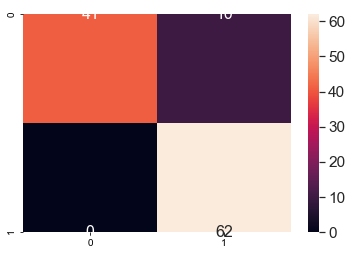

In [6]:
from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


matrix = confusion_matrix(y_labels, ynew)

#df_cm = pd.pivot_table(data=sns.load_dataset("flights"),
#                       index='month',
#                       values='passengers',
#                       columns='year')

df_cm = pd.DataFrame(matrix,
                     index = [i for i in "01"],
                     columns = [i for i in "01"])

print(df_cm.head())

plt.figure()
plt.xlabel('Actual', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Predicted', fontsize = 15) # y-axis label with fontsize 15

sn.set(font_scale=1.4) # for label size
sn.heatmap(
    df_cm, 
    annot=True,
    annot_kws={"size": 16}
    )